In [6]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 27.4 MB/s eta 0:00:0000:0100:01


In [1]:
!python -V

Python 3.10.9


In [2]:
!whoami

ubuntu


In [3]:
!hostname

ip-172-31-21-22


In [1]:
import pandas as pd

In [7]:
# https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')

In [8]:
df.shape

(76518, 20)

In [9]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


In [10]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

# Homework Module 1

In [18]:
df_train = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
df_val = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')

print(df_train.shape)
print(df_val.shape)

(2463931, 19)
(2979431, 19)


In [4]:
df_train.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [44]:
df_train['duration'] = (df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']).dt.total_seconds()/60
df_val['duration'] = (df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']).dt.total_seconds()/60

/tmp/ipykernel_9153/2704797934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['duration'] = (df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']).dt.total_seconds()/60


In [22]:
df_train.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
135212,1,2022-01-03 10:00:09,2022-01-03 10:23:37,3.0,4.30,1.0,N,230,261,2,17.5,2.5,0.5,0.00,0.0,0.3,20.80,2.5,0.0,23.466667
2011682,1,2022-01-26 20:46:33,2022-01-26 20:52:47,1.0,0.90,1.0,Y,162,100,1,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0,6.233333
1792394,2,2022-01-24 12:19:57,2022-01-24 12:32:47,1.0,2.09,1.0,N,142,263,1,10.5,0.0,0.5,3.45,0.0,0.3,17.25,2.5,0.0,12.833333
2061980,2,2022-01-27 13:09:52,2022-01-27 13:17:21,1.0,0.80,1.0,N,164,170,1,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,0.0,7.483333
1674959,2,2022-01-22 20:43:23,2022-01-22 20:51:22,2.0,1.55,1.0,N,50,186,1,7.5,0.5,0.5,3.39,0.0,0.3,14.69,2.5,0.0,7.983333
122473,1,2022-01-03 06:58:00,2022-01-03 07:13:51,1.0,2.70,1.0,N,48,238,1,12.5,2.5,0.5,3.16,0.0,0.3,18.96,2.5,0.0,15.850000
429451,2,2022-01-07 11:47:04,2022-01-07 11:52:53,1.0,1.14,1.0,N,50,100,1,6.0,0.0,0.5,2.32,0.0,0.3,11.62,2.5,0.0,5.816667
1848876,2,2022-01-25 07:42:45,2022-01-25 07:48:43,2.0,1.02,1.0,N,238,166,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,0.0,0.0,5.966667
767579,2,2022-01-11 20:23:03,2022-01-11 20:32:57,1.0,2.01,1.0,N,239,41,1,9.0,0.5,0.5,1.92,0.0,0.3,14.72,2.5,0.0,9.900000
2347624,2,2022-01-31 14:32:18,2022-01-31 14:46:10,1.0,1.40,1.0,N,263,140,2,9.5,0.0,0.5,0.00,0.0,0.3,12.80,2.5,0.0,13.866667


In [23]:
df_train['duration'].describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

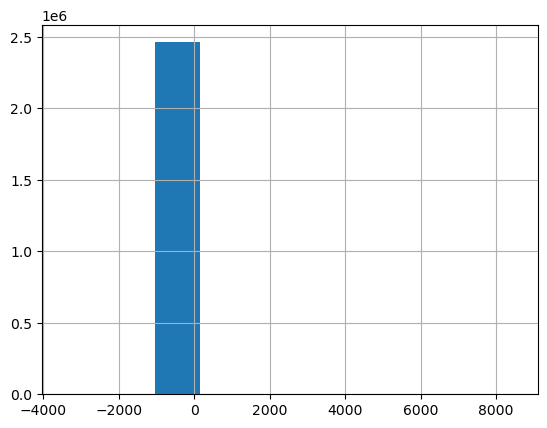

In [24]:
df_train['duration'].hist();

In [26]:
df_train.query("duration >= 1 and duration <= 60").shape[0] \
/ df_train.shape[0]

0.9827547930522406

In [37]:
df_train = df_train.query("duration >= 1 and duration <= 60")

In [27]:
from sklearn.feature_extraction import DictVectorizer

In [28]:
df_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [38]:
cols = ['PULocationID', 'DOLocationID']
train_dicts = df_train[cols].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [39]:
X_train.shape

(2421440, 2)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
target = 'duration'
y_train = df_train[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

8.920327827581444

In [47]:
df_val = df_val.query("duration >= 1 and duration <= 60")

In [48]:
val_dicts = df_val[cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [49]:
y_val = df_val[target].values

y_val_pred = lr.predict(X_val)

mean_squared_error(y_val, y_val_pred, squared=False)

9.638272212087234